# Sequential k-means Clustering

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [6]:
# load iris dataset
raw_iris = load_iris()
iris_data = raw_iris.data
iris = iris_data
iris = pd.DataFrame(raw_iris.data, columns = raw_iris.feature_names)
iris['target'] = raw_iris.target
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [137]:
class OnlineKMeans:
    def __init__(self, k):
        self.k = k
        self.centroids = None
        self.cluster_counts = None

    def fit(self, X):
        np.random.seed(11)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        self.cluster_counts = np.zeros(self.k)

    def predict(self, new_point):
        cluster_distances = np.zeros(self.k)
        for cluster in range(self.k):
            cluster_distances[cluster] = np.sqrt(np.sum((new_point - self.centroids[cluster])**2))
        return np.argmin(cluster_distances)

    def update(self, new_point):
        cluster_distances = np.zeros(self.k)
        for cluster in range(self.k):
            cluster_distances[cluster] = np.sqrt(np.sum((new_point - self.centroids[cluster])**2))
        c = np.argmin(cluster_distances)
        self.cluster_counts[c] += 1
        self.centroids[c] += 1.0 / self.cluster_counts[c] * (new_point - self.centroids[c])

    def plot_clusters(self, X):
        plt.scatter(X[:, 0], X[:, 1], c=np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1), cmap='viridis')
        plt.title("Online K-Means Clustering")
        plt.xlabel("Sepal Length (cm)")
        plt.ylabel("Sepal Width (cm)")

        # Plot the cluster centers
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=200, label='Cluster Centers')
        plt.legend()
        plt.show()


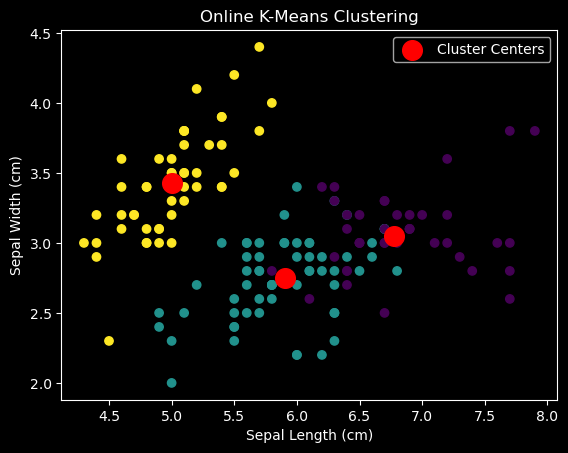

In [138]:
# Create an instance of the OnlineKMeans class
online_kmeans = OnlineKMeans(k=3)

# Initialize the centroids
online_kmeans.fit(iris_data)

# Loop through each data point and classify it
for point in iris_data:
    online_kmeans.update(point)

# Plot the final results
online_kmeans.plot_clusters(iris_data)


## SKLearn K-Means

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


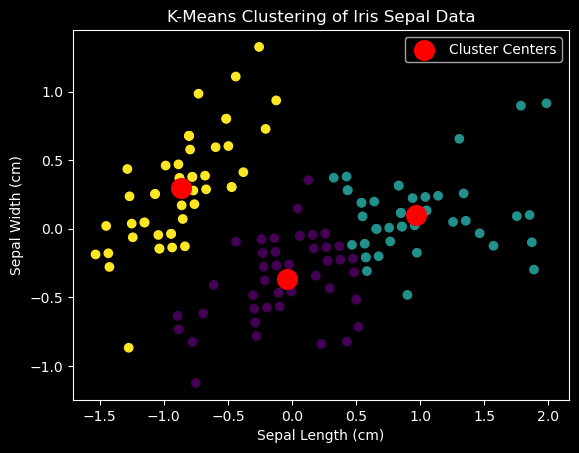

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the sepal length and sepal width features

# Initialize the K-means clustering with the desired number of clusters (k)
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the K-means model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Reduce the dimensionality of the data for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the data points with different colors for each cluster
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering of Iris Sepal Data")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# Plot the cluster centers
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.legend()

plt.show()
